In [211]:
# %load /Users/shleifer/flow/notes/preamble.py
import sys
sys.path = ['/Users/shleifer/flow/kensho-learn/', '/app/', '.'] + sys.path
%load_ext autoreload
%autoreload 2
%matplotlib inline
#from klearn.nb_start import *
%config InlineBackend.figure_format = 'retina'
from lane_lines.nb_start import *

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
from lane_lines.fit_poly import rgb_read
from detection.window import slide_window

In [13]:
from detection.lesson_functions import *
from detection.utils import *

In [15]:
non_vehicles = glob.glob('non-vehicles/GTI/*')
vehicles = glob.glob('vehicles/*/*')

In [16]:
from lane_lines.viz import plot_side_by_side

In [57]:
y_start_stop = [400, 800]

In [166]:
from sklearn.utils import shuffle

In [316]:
%%time
X = [single_img_features(rgb_read(path), **PARAMS) 
     for path in (
    vehicles + non_vehicles)]
Xmat = np.vstack(X)

/Users/shleifer/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


CPU times: user 27 s, sys: 2.47 s, total: 29.5 s
Wall time: 35.6 s


In [399]:
len(vehicles)

8792

In [403]:
len(non_vehicles)* 2

7800

In [317]:
Xmat[0].shape

(2580,)

In [318]:
y = np.concatenate([np.ones(len(vehicles)),np.zeros(len(non_vehicles))])

In [269]:
rand_state = 42

In [320]:
from sklearn.svm import LinearSVC

In [321]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    Xmat, y, test_size=0.2, random_state=rand_state)


In [386]:
clf =  make_pipeline(StandardScaler(), LogisticRegression(random_state=42, n_jobs=-1, class_weight='balanced'))

In [387]:
clf.fit(X_train, y_train)


Pipeline(steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logisticregression', LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=-1, penalty='l2', random_state=42,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False))])

In [388]:
print('Test Accuracy = ', round(clf.score(X_test, y_test), 4))

Test Accuracy =  0.9779


In [389]:
t=time.time()
n_predict = 10
print('My SVC predicts: ', clf.predict(X_test[0:n_predict]))
print('For these',n_predict, 'labels: ', y_test[0:n_predict])
t2 = time.time()
print(round(t2-t, 5), 'Seconds to predict', n_predict,'labels with SVC')

My SVC predicts:  [ 1.  1.  1.  1.  0.  0.  1.  0.  0.  0.]
For these 10 labels:  [ 1.  1.  1.  1.  0.  0.  1.  0.  0.  0.]
0.00213 Seconds to predict 10 labels with SVC


In [398]:
probas = clf.predict_proba(X_test)[:,1]; np.mean(probas)

0.68087229392218829

In [391]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

In [392]:

fpr, tpr, thresholds = roc_curve(y_test, probas, pos_label=1)

In [397]:
#probas


In [393]:
auc(fpr, tpr)

0.99732338165471335

In [394]:
from sklearn.metrics import *

In [395]:
def confusion_df(clf, y_true, x_test, norm=False):
    '''make a dataframe of confusion matrix
    Args:
        clf: a sklearn classifier which implements predict
        y_true: actual values of y
        x_test: to use to predict
        norm: (default False). if True, normalized rows to sum to 1
    Returns a pandas df which looks like
        Predicted    False   True
        Actual
        False       1005    19
        True        7       100
    '''
    cm = confusion_matrix(y_true, clf.predict(x_test))
    if norm:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    cm = pd.DataFrame(cm, index=clf.classes_, columns=clf.classes_)
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    return cm

In [396]:
confusion_df(clf, y_test, X_test)

Predicted,0.0,1.0
Actual,,
0.0,769,17
1.0,39,1714


In [385]:
non_vehicles

['non-vehicles/GTI/image1.png',
 'non-vehicles/GTI/image10.png',
 'non-vehicles/GTI/image100.png',
 'non-vehicles/GTI/image1000.png',
 'non-vehicles/GTI/image1001.png',
 'non-vehicles/GTI/image1002.png',
 'non-vehicles/GTI/image1003.png',
 'non-vehicles/GTI/image1004.png',
 'non-vehicles/GTI/image1005.png',
 'non-vehicles/GTI/image1006.png',
 'non-vehicles/GTI/image1007.png',
 'non-vehicles/GTI/image1008.png',
 'non-vehicles/GTI/image1009.png',
 'non-vehicles/GTI/image101.png',
 'non-vehicles/GTI/image1010.png',
 'non-vehicles/GTI/image1011.png',
 'non-vehicles/GTI/image1012.png',
 'non-vehicles/GTI/image1013.png',
 'non-vehicles/GTI/image1014.png',
 'non-vehicles/GTI/image1015.png',
 'non-vehicles/GTI/image1016.png',
 'non-vehicles/GTI/image1017.png',
 'non-vehicles/GTI/image1018.png',
 'non-vehicles/GTI/image1019.png',
 'non-vehicles/GTI/image102.png',
 'non-vehicles/GTI/image1020.png',
 'non-vehicles/GTI/image1021.png',
 'non-vehicles/GTI/image1022.png',
 'non-vehicles/GTI/image1023

In [326]:
from detection.window import slide_window
image = rgb_read('test_images/test1.jpg')

In [327]:
single_img_features(image, **PARAMS).shape

/Users/shleifer/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


(510252,)

In [328]:
single_img_features(cv2.resize(image, (64,64)), **PARAMS).shape

/Users/shleifer/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


(2580,)

In [298]:
#single_img_features(cv2.resize(image, (64,64)), **SINGLE_IMG_PARAMS).shape

In [295]:
from detection.constants import *

In [300]:
#pd.DataFrame(dict(p=pd.Series(PARAMS), sp=pd.Series(SINGLE_IMG_PARAMS)))

In [196]:
from detection.search_classify import search_windows

In [193]:
X_test.shape

(2539, 2580)

In [330]:
hot_windows = search_windows(image, windows, clf, **PARAMS)

/Users/shleifer/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


In [331]:
#hot_windows

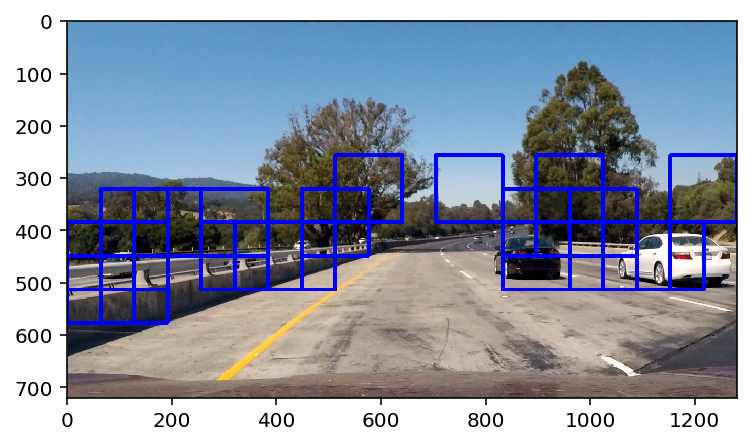

In [339]:
#hot_windows = search_windows(image, windows, clf, **params)                       

window_img = draw_boxes(image, hot_windows, color=(0, 0, 255), thick=6)                    

plt.imshow(window_img)


In [340]:
from detection.heatmap import draw_heat

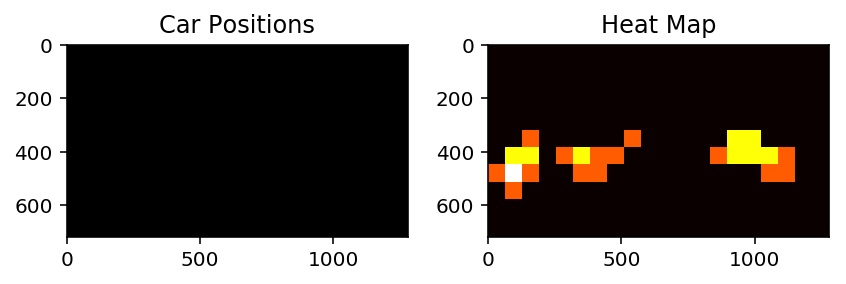

In [342]:
draw_heat(hot_windows, img)

In [333]:


ystart = 400
ystop = 656
scale = 1.5

#out_img = find_cars(image, ystart, ystop, scale, clf)


In [334]:
from detection.find_cars import find_cars
from detection.constants import PARAMS
import cv2
from lane_lines.nb_start import *
from detection.lesson_functions import *
from detection.constants import PARAMS

In [335]:
#finmbd_cars(rgb_read(vehicles[0])

In [336]:
#from detection.constants import SINGLE_IMG_PARAMS

from detection.find_cars import find_cars

/Users/shleifer/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


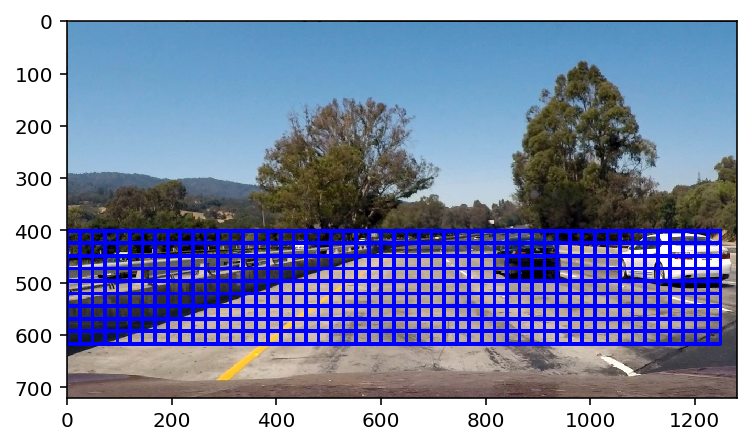

In [338]:
plt.imshow(cars)